<a href="https://colab.research.google.com/github/dtnovak26/ME239/blob/homeworkUploads/ME239_HW10_novak104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(lecture10:homework)=
# Homework 10

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

```{note}
+ Please match all the pages corresponding to each of the questions when you submit on gradescope.
```

## Student details

+ **First Name:** Drew
+ **Last Name:** Novak
+ **Email:** novak104@purdue.edu

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')
import numpy as np
import scipy.stats as st

/tmp/ipython-input-122018214.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', 'svg')


(lecture10:homework:problem1)=
## Problem 1 - An alternative way to construct the generalized uniform distribution $U([a,b])$

Let $Z$ be a standard uniform random variable:

$$
Z\sim U([0,1]).
$$

Define the random variable:

$$
X = a + (b-a) Z.
$$

+ Show that:

$$
X\sim U([a,b]).
$$

Hint: Prove that the CDF of $X$ is $F_X(x) = p(X\le x) = \frac{x-a}{b-a}$. This is one line.

**Answer:** Define CDF:
$$F_X (x) = P(X <= x)$$
$$F_X (x) = P(a + (b - a) Z <- x)$$

Isolate Z algebraically:

$$F_X (x) = P(Z \le \frac{(x - a)}{(b-a)})$$

Use defined CDF to define peicewise:

$$F_Z(z) = P(Z \le z) = \begin{cases} 0 & \text{if } z < 0 \\ z & \text{if } 0 \le z \le 1 \\ 1 & \text{if } z > 1 \end{cases}$$

Determine all cases and combined with previously defined Z to determine the CDF of X:

$$F_X(x) \begin{cases} 0 & \text{if } x < a \\ \frac{(x-a)}{(b-a)} & \text{if } a \le x \le b \\ 1 & \text{if } x > 1 \end{cases}$$

This middle case is proof of the requested value
<br>

+ The function `numpy.random.rand` gives you uniform random samples in $[0, 1]$.
Take 1,000 such samples and transform them to uniform samples in $[-1, 5]$.
Hint: Fill in the missing code below.

In [ ]:
a = -1
b = 5
z = np.random.rand(1000)
x = a + (b - a) * z # Samples x for hist

Test if you are getting the right answer by doing the histogram of your samples (it should be almost flat between -1 and 5):

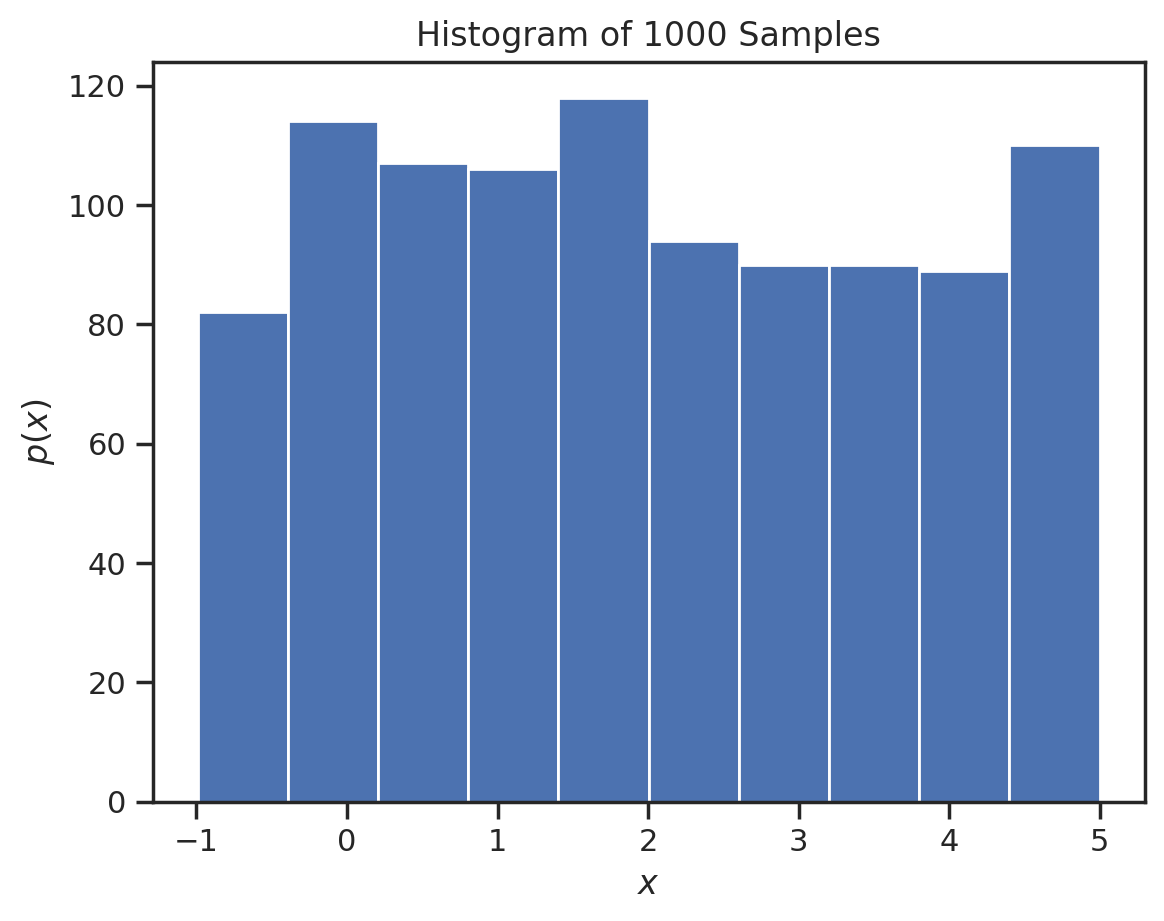

In [ ]:
# Plotting histogram of the 1000 samples that we chose
fig, ax = plt.subplots()
ax.hist(x)
ax.set_title('Histogram of 1000 Samples')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$');

(lecture10:homework:problem2)=
# Problem 2 - The Exponential distribution

The Exponential distribution models the probability distribution of the time between events which occur [continuously and independently at a constant rate](https://en.wikipedia.org/wiki/Exponential_distribution).
Examples of such a situation are:
+ The time between phone calls in a help center.
+ The time between the arrival of cars at a toll station.
+ The time between the arrival of customers.
+ The time between two earthquakes.
+ The time between two micrometeoroid impacts on an Moon research base.
+ The time between faults in a mechanical system. However, this is a gross approximation because the rate of faults in a mechanical system increases with time, it is not constant.

We write:

$$
T \sim \text{Exp}(\lambda),
$$

and we read:

> $T$ follows an Exponential distribution with rate parameter $\lambda$.

The rate parameter $\lambda$ is positive and has units of inverse time.
You can think of $\lambda$ as the number of events per unit of time.

The CDF of the Exponential is:

$$
F(t) = \begin{cases}
0,& t < 0,\\
1 - e^{-\lambda t},& t \ge 0.
\end{cases}
$$

+ Prove mathematically that the PDF of the random variable $T$ is:

$$
p(t) = \lambda e^{-\lambda t}.
$$

Hint: Use one of the properties of the PDF.

**Answer:** Given CDF as F(t) (above)  we can take the derivative to get the PDF.

Derivative of 0 is 0, we must use chain rule to get the derivative of the $1 - e^{-\lambda t}$

$$\frac{d}{dt}(e^{-\lambda t}) =  e^{-\lambda t} * (-\lambda) = -\lambda e^{-\lambda t}$$

Substitude back in for PDF:

$$p(t) = 0 - (-\lambda e^{-\lambda t}) = \lambda e^{-\lambda t}$$

This provese the PDF of a random variable T for values $T \ge 0$ ($0$ for values  $t < 0$)

<br>

+ [Micrometeoroids](https://en.wikipedia.org/wiki/Micrometeoroid) make space exploration very challenging.
Even though the mass of these projectiles is very small (less than 1 gram), they move with a very high-velocity
(of the order of 10 km per second) and thus they are will be gradually degrading the protective layers of deep space habitats.
For a Moon base with an area of 1000 squared meters, the rate of micrometeoroid impacts is about:

$$
\lambda = 3\times 10^{-6}\;\text{s}^{-1}.
$$

Read the [scipy.stats.expon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html) documentation and make an Exponential random variable $T$ with this rate:

In [ ]:
# You cannot use lambda because it is a reserved word.
# Call the rate lam instead:
lam = 3e-6 # in inverse seconds
T = st.expon(scale= 1 / lam) # use the inverse of lambda to get seconds

+ Take 1000 samples from the random variable you just constructed and draw their histogram.


[]

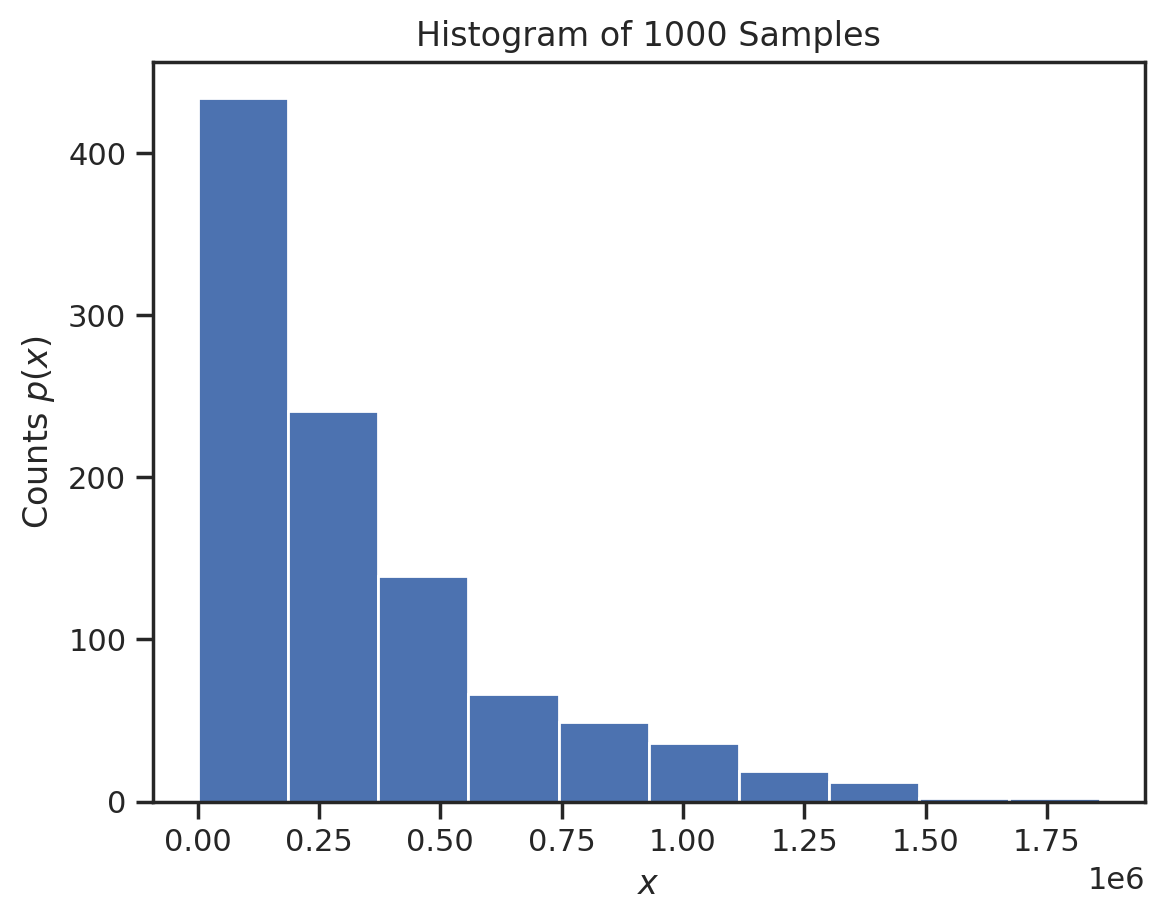

In [ ]:
samples = T.rvs(size=1000) # Take the 1000 samples

# Gemini assisted with adding the following line to make graph readable (DN 20251106)
# Plot from 0 up to 4x the mean time to get a good view
t_values = np.linspace(0, 4 * (1/lam), 1000)

fig, hist1 = plt.subplots()
hist1.hist(samples, bins = 10) # Just messed around with bins to see how it affected things, settled on 10
hist1.set_title('Histogram of 1000 Samples')
hist1.set_xlabel('$x$')
hist1.set_ylabel('Counts $p(x)$');
plt.plot()

+ Plot the CDF of $T$:

Text(0.5, 1.0, 'CDF Plot')

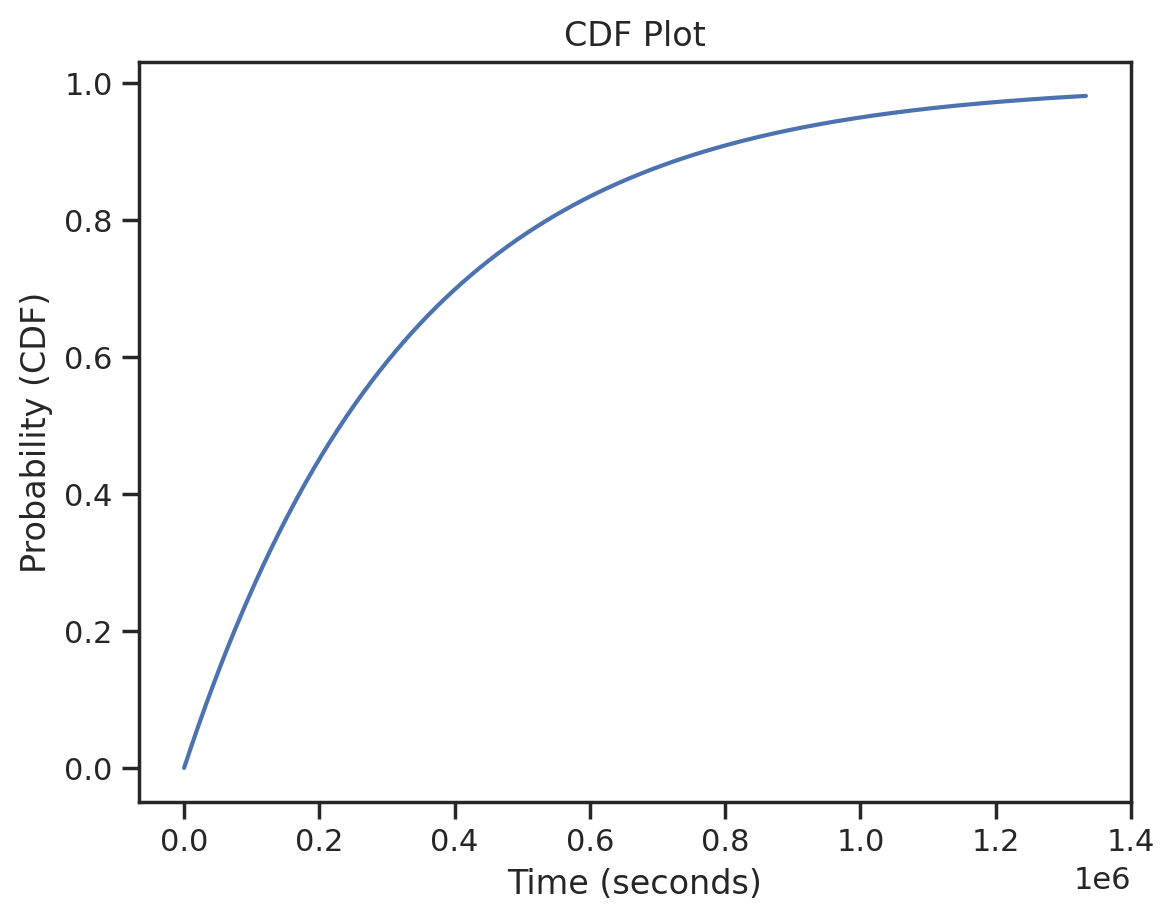

In [ ]:
# Find probability
SECONDS_DAY = 86400
prob_daily = T.cdf(SECONDS_DAY)

# Plotting CDF
fig, ax = plt.subplots()
ax.plot(t_values, T.cdf(t_values), label='CDF')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Probability (CDF)');
ax.set_title('CDF Plot')

+ Find the probability that we have a micrometeoroid impact within a day.
Hint: Remember that the units of $T$ are seconds.

In [ ]:
# Print results rounded for output
print(f"Seconds in one day: {SECONDS_DAY}")
print(f"Mean time between impacts (1/lam): {1/lam:,.0f} seconds")
print(f"Probability of impact within one day: {prob_daily:.4f}") # prob_daily referenced from above
print(f"Percentage: {prob_daily * 100:.2f}%")

Seconds in one day: 86400
Mean time between impacts (1/lam): 333,333 seconds
Probability of impact within one day: 0.2283
Percentage: 22.83%


+ Plot the PDF of T.

Text(0.5, 1.0, 'PDF Plot')

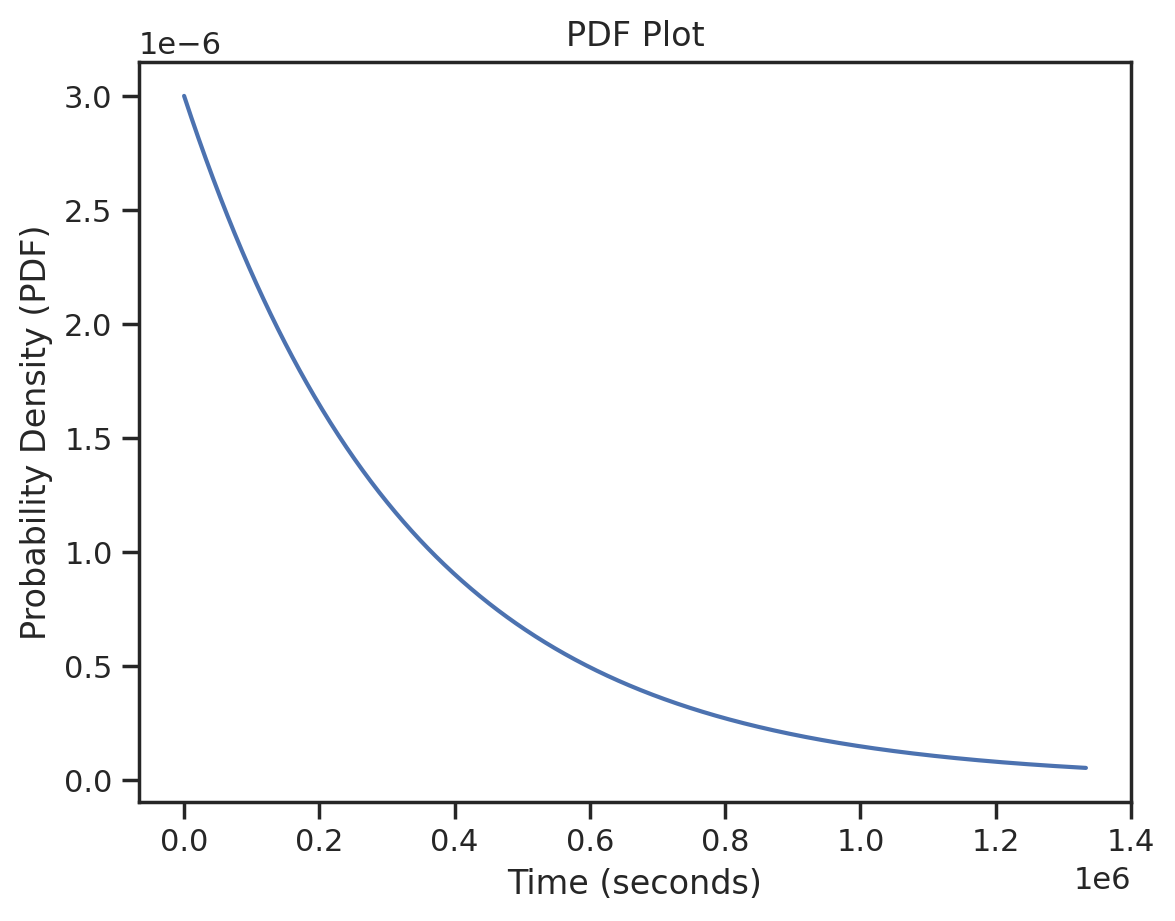

In [ ]:
# Should see opposite of the CDF
fig, ax = plt.subplots()
ax.plot(t_values, T.pdf(t_values), label='PDF')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Probability Density (PDF)')
ax.set_title('PDF Plot')

Run the following code to convert the notebook to a pdf. Verify that the file path to the notebook is correct.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!apt-get install inkscape texlive texlive-xetex texlive-latex-extra pandoc --quiet
!pip install pypandoc --quiet
!jupyter nbconvert --to PDF '/content/drive/MyDrive/Colab Notebooks/ME239_HW10_novak104.ipynb'

Mounted at /content/drive
Reading package lists...
Building dependency tree...
Reading state information...
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  aspell aspell-en dictionaries-common dvisvgm enchant-2 fig2dev
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 gawk ghostscript glib-networking glib-networking-common
  glib-networking-services gsettings-desktop-schemas gsfonts hunspell-en-us
  imagemagick imagemagick-6-common imagemagick-6.q16 lib2geom1.1.0
  libapache-pom-java libaspell15 libatkmm-1.6-1v5 libcairomm-1.0-1v5
  libcdr-0.1-1 libcommons-logging-java libcommons-parent-java libdbus-glib-1-2
  libdjvulibre-text libdjvulibre21 libenchant-2-2 libfftw3-double3
  libfontbox-java libgc1 libglibmm-2.4-1v5 libgs9 libgs9-common libgsl27
  libgslcblas0 libgspell-1-2 libgspell-1-common libgtkmm-3.0-1v5
  libhunspell-1.7-0 libidn12 libij